In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.DataFrame({'a':[np.nan,2,3],'b':[4,5,np.nan]})

In [3]:
df

,a,b
0,NaN,4.0
1,2.0,5.0
2,3.0,NaN


In [4]:
df=pd.DataFrame([i for i in range(10)],columns=['Data'],index=pd.date_range("2021-01-01",periods=10))
df=df.drop(['2021-01-03','2021-01-05','2021-01-06'])
df

,Data
2021-01-01,0
2021-01-02,1
2021-01-04,3
2021-01-07,6
2021-01-08,7
2021-01-09,8
2021-01-10,9


In [5]:
df=pd.DataFrame({'Weight (kg)':[86,83,0,76,109,95,0]})
df

,Weight (kg)
0,86
1,83
2,0
3,76
4,109
5,95
6,0


In [6]:
 from sklearn.linear_model import LinearRegression
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import r2_score

In [7]:
data=pd.read_csv('files/home-data/train.csv',index_col=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.shape

(1460, 80)

In [9]:
data=data.select_dtypes(include='number')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [11]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [12]:
# x=independent y=dependent
def regression_score(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    lin=LinearRegression()
    lin.fit(X_train,y_train)
    y_pred=lin.predict(X_test)
    return r2_score(y_pred,y_test)

In [13]:
test_base=data.dropna()
regression_score(test_base.drop('SalePrice',axis=1),test_base[['SalePrice']])

0.654828906832541

In [14]:
test_base=data.fillna(data.mean())
regression_score(test_base.drop('SalePrice',axis=1),test_base[['SalePrice']])

0.7439346373898226

In [15]:
test_base=data.fillna(data.mode().iloc[0])
regression_score(test_base.drop('SalePrice',axis=1),test_base[['SalePrice']])

0.7465420669734295

In [16]:
weather=pd.read_parquet('files/weather.parquet')

In [17]:
weather.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [18]:
idx=pd.Series(data=pd.date_range(start=weather.index.min(),end=weather.index.max(),freq="H"))
mask=idx.isin(weather.index)
idx[~mask]

2018    2006-03-26 02:00:00
10754   2007-03-25 02:00:00
19658   2008-03-30 02:00:00
28394   2009-03-29 02:00:00
37130   2010-03-28 02:00:00
45866   2011-03-27 02:00:00
54602   2012-03-25 02:00:00
63506   2013-03-31 02:00:00
72242   2014-03-30 02:00:00
74784   2014-07-14 00:00:00
74785   2014-07-14 01:00:00
74786   2014-07-14 02:00:00
80978   2015-03-29 02:00:00
89714   2016-03-27 02:00:00
dtype: datetime64[ns]

In [44]:
weather.loc['2006-03-26 02:00:00']


KeyboardInterrupt



In [45]:
w_idx=weather.reindex(idx)

In [46]:
w_idx.interpolate()[w_idx['Summary'].isna()]

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
2006-03-26 02:00:00,NaN,NaN,7.966667,6.794444,0.8650,7.29330,212.5,12.38090,0.0,508.700,NaN
2007-03-25 02:00:00,NaN,NaN,4.463889,2.888889,0.8650,9.48290,67.0,14.88445,0.0,1018.840,NaN
2008-03-30 02:00:00,NaN,NaN,4.486111,3.269444,0.7550,7.11620,169.5,15.39160,0.0,1021.590,NaN
2009-03-29 02:00:00,NaN,NaN,12.111111,12.111111,0.5100,17.37995,165.0,13.04100,0.0,1011.770,NaN
2010-03-28 02:00:00,NaN,NaN,5.666667,3.775000,0.8450,9.12870,264.5,7.64750,0.0,1010.800,NaN
2011-03-27 02:00:00,NaN,NaN,8.347222,7.241667,0.8600,7.38185,215.5,10.23155,0.0,1015.350,NaN
2012-03-25 02:00:00,NaN,NaN,6.727778,6.727778,0.6850,3.34075,171.0,15.62505,0.0,1022.605,NaN
2013-03-31 02:00:00,NaN,NaN,9.741667,7.988889,0.9300,12.26015,118.5,12.04280,0.0,998.775,NaN
2014-03-30 02:00:00,NaN,NaN,4.705556,4.155556,0.6850,4.58850,187.0,15.64115,0.0,1022.105,NaN
2014-07-14 00:00:00,NaN,NaN,18.377778,18.377778,0.8325,3.65470,177.5,16.10000,0.0,1012.790,NaN


In [47]:
 (weather['Pressure (millibars)'].loc['2006']).isna().any()

False

In [48]:
p_2016=weather['Pressure (millibars)'].loc['2006']

<AxesSubplot:xlabel='Formatted Date'>

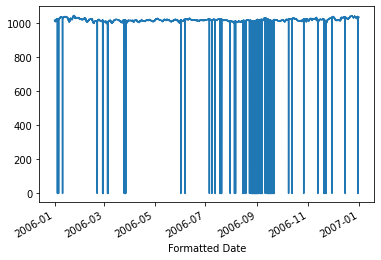

In [49]:
p_2016.plot()

In [50]:
p_2016.isna().any()

False

In [51]:
(p_2016==0).any()

True